<a href="https://colab.research.google.com/github/mariaulia/2025_Kecerdasan-Buatan/blob/main/Jobsheet9_KB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JOBSHEET 9: SVM DAN NAÏVE BAYES


##Percobaan 1 : Implementasi Support Vector Machine (SVM)

In [ ]:
import pandas as pd

# Membaca file diabetes.csv
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']


In [ ]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)


SVC()

In [ ]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7440944881889764

##Percobaan 2 : Implementasi Support Vector Regression (SVR)

In [ ]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
import numpy as np

# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = X.values[:,np.newaxis]



In [ ]:
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model  = SVR(C=1000, gamma=0.05, kernel='rbf')

# melatih model dengan fungsi fit
model.fit(X,y)

SVR(C=1000, gamma=0.05)

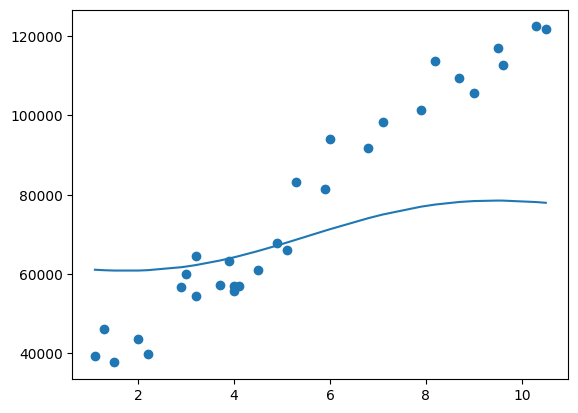

In [ ]:
import matplotlib.pyplot as plt

# memvisualisasikan model
plt.scatter(X, y)
plt.plot(X, model.predict(X))


##Percobaan 3 : Implementasi Naïve Bayes

In [ ]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')
dataset.head()

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


In [ ]:
X = dataset.iloc[:,2:-1]
y = dataset.iloc[:, -1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [ ]:
# prediksi X_test
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 87.5%
Confussion Matrix : 
[[52  4]
 [ 6 18]]


<ipython-input-35-706575882>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


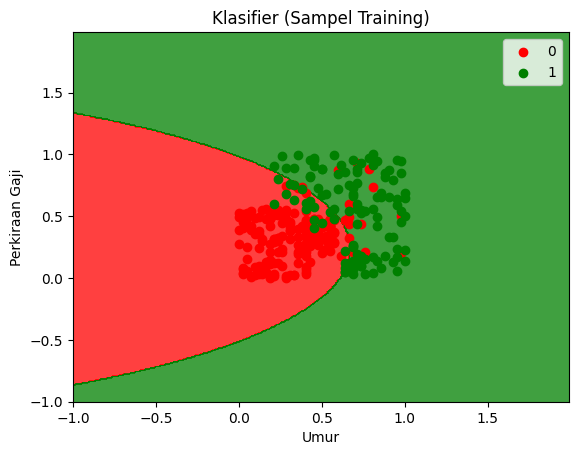

In [ ]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()



<ipython-input-36-1137279309>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


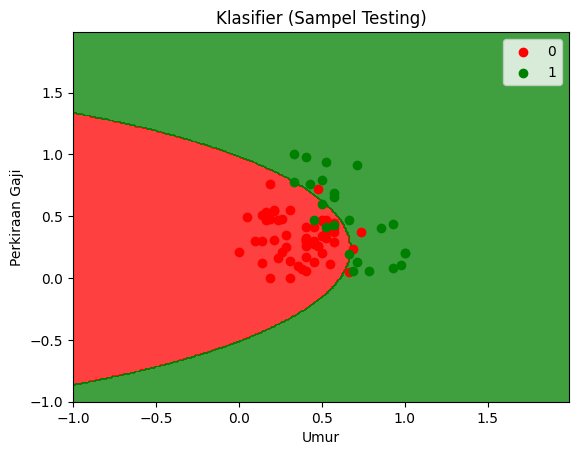

In [ ]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Testing)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()



###Algoritma SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load dataset
df = pd.read_csv('diabetes.csv')

# 2. Pisahkan fitur (X) dan label (y)
X = df[df.columns[:8]]
y = df['Outcome']

# 3. Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Bagi data jadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42
)

# 5. Lakukan Grid Search untuk mencari parameter terbaik pada SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)

# 6. Prediksi dan hitung akurasi
y_pred = grid.predict(X_test)
akurasi = accuracy_score(y_test, y_pred) * 100

# 7. Tampilkan hasil dalam bentuk persentase
print("Akurasi SVM Terbaik: {:.2f}%".format(akurasi))
print("Parameter Terbaik:", grid.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Akurasi SVM Terbaik: 75.59%
Parameter Terbaik: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load dataset
df = pd.read_csv('diabetes.csv')

# 2. Pisahkan fitur (X) dan label (y)
X = df[df.columns[:8]]
y = df['Outcome']

# 3. Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42
)

# 5. Buat model SVM dengan parameter default
clf = SVC()
clf.fit(X_train, y_train)

# 6. Prediksi dan hitung akurasi
y_pred = clf.predict(X_test)
akurasi = accuracy_score(y_test, y_pred) * 100

# 7. Tampilkan akurasi dalam persen
print("Akurasi SVM (tanpa tuning): {:.2f}%".format(akurasi))


Akurasi SVM (tanpa tuning): 75.59%


###Algoritma SVR

In [6]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
data = pd.read_csv("Salary_Data.csv")

# 2. Pisahkan atribut dan label
X = data[['YearsExperience']]
y = data['Salary']

# 3. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Parameter grid ringan
param_grid_svr = {
    'C': [100, 1000],
    'gamma': [0.01, 0.1],
    'kernel': ['rbf']  # lebih cepat dibanding semua kernel
}

# 5. GridSearch dengan paralelisasi CPU
grid_svr = GridSearchCV(
    SVR(),
    param_grid_svr,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 6. Latih model
grid_svr.fit(X_scaled, y)

# 7. Evaluasi
print("Best Parameters (SVR):", grid_svr.best_params_)
print("Best R2 Score (Train CV):", round(grid_svr.best_score_, 4))

# 8. Prediksi dan evaluasi pada semua data
y_pred = grid_svr.predict(X_scaled)
print("R2 Score on Full Data:", round(r2_score(y, y_pred), 4))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters (SVR): {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Best R2 Score (Train CV): -15.6889
R2 Score on Full Data: 0.119


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Parameters Terbaik (SVR): {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Best R2 Score (Train CV): -15.6889
R2 Score on Full Data: 0.119


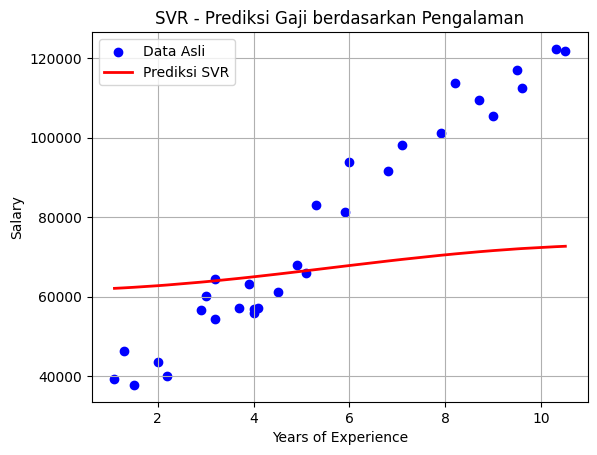

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
data = pd.read_csv("Salary_Data.csv")

# 2. Pisahkan atribut dan label
X = data[['YearsExperience']]
y = data['Salary']

# 3. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Parameter grid ringan
param_grid_svr = {
    'C': [100, 1000],
    'gamma': [0.01, 0.1],
    'kernel': ['rbf']  # lebih cepat dibanding semua kernel
}

# 5. GridSearch dengan paralelisasi CPU
grid_svr = GridSearchCV(
    SVR(),
    param_grid_svr,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 6. Latih model
grid_svr.fit(X_scaled, y)

# 7. Evaluasi
print("Parameters Terbaik (SVR):", grid_svr.best_params_)
print("Best R2 Score (Train CV):", round(grid_svr.best_score_, 4))

# 8. Prediksi dan evaluasi pada semua data
y_pred = grid_svr.predict(X_scaled)
print("R2 Score on Full Data:", round(r2_score(y, y_pred), 4))

# Visualisasi hasil prediksi
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, grid_svr.best_estimator_.predict(X_scaled), color='red', linewidth=2, label='Prediksi SVR')
plt.title('SVR - Prediksi Gaji berdasarkan Pengalaman')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


###Algoritma Naïve Bayes

Parameter terbaik: {'var_smoothing': 1e-12}
Akurasi setelah tuning: 92.50%
Confusion Matrix:
 [[72  1]
 [ 8 39]]


<ipython-input-14-1858490264>:58: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


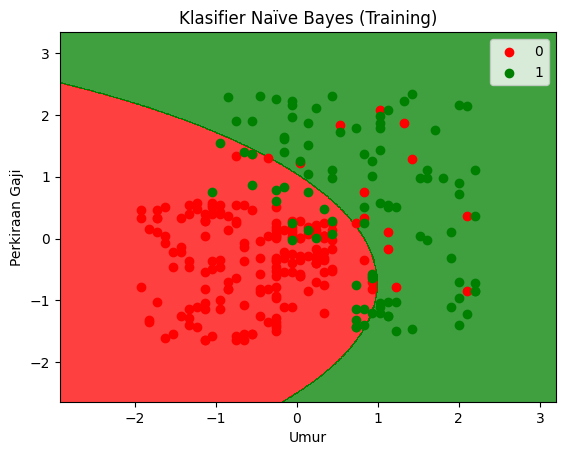

In [14]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# 2. Load dataset
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')

# 3. Pisahkan fitur dan label (Umur & Gaji saja)
X = dataset.iloc[:, 2:-1]  # Umur dan Gaji
y = dataset.iloc[:, -1]    # Transaksi

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Standardisasi fitur
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6. Grid Search
param_grid_nb = {
    'var_smoothing': [1e-12, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
}

grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)

# 7. Evaluasi hasil
best_nb = grid_nb.best_estimator_
y_pred = best_nb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Parameter terbaik:", grid_nb.best_params_)
print("Akurasi setelah tuning: {:.2f}%".format(acc * 100))
print("Confusion Matrix:\n", cm)

# 8. Visualisasi hasil training
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(X1, X2, best_nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Klasifier Naïve Bayes (Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()
